In [16]:
!pip install -i https://pypi.douban.com/simple pandasql

Looking in indexes: https://pypi.douban.com/simple
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26818 sha256=9f460b1a1ea35d57c7a98709645df6fdcbdd900ecc96e0598f17b00dad32958b
  Stored in directory: c:\users\chuankang.fan\appdata\local\pip\cache\wheels\a9\ad\e1\66d85cbc58e5464c76ac704cbb9e30c00474a869cf0236438d
Successfully built pandasql
Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26818 sha256=882f96cead7c0ced19dbf832dec4d2a5507c4d8404e0b9c524b17cf6d4511ca6
  Stored in directory: c:\users\chuankang.fan\appdata\local\pip\cache\wheels\21\96\d6\1f5467387377611e11704ee1b827e25a72a36fdac64ce3a812
Successfully built pandasql


# Elon Musk Tweet Analysis

## Load Data 

In [2]:
import pandas as pd

In [3]:
em_tweets = pd.read_csv('data/elonmusk_tweets.csv')

In [4]:
em_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2819 non-null   int64 
 1   created_at  2819 non-null   object
 2   text        2819 non-null   object
dtypes: int64(1), object(2)
memory usage: 66.2+ KB


In [5]:
em_tweets

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."
...,...,...,...
2814,142881284019060736,2011-12-03 08:22:07,b'That was a total non sequitur btw'
2815,142880871391838208,2011-12-03 08:20:28,"b'Great Voltaire quote, arguably better than T..."
2816,142188458125963264,2011-12-01 10:29:04,b'I made the volume on the Model S http://t.co...
2817,142179928203460608,2011-12-01 09:55:11,"b""Went to Iceland on Sat to ride bumper cars o..."


In [6]:
em_tweets['created_at'] = pd.to_datetime(em_tweets['created_at'])

In [7]:
em_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          2819 non-null   int64         
 1   created_at  2819 non-null   datetime64[ns]
 2   text        2819 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 66.2+ KB


In [8]:
print("start_date: ", em_tweets.created_at.min())
print("end date: ", em_tweets.created_at.max())

start_date:  2010-06-04 18:31:57
end date:  2017-04-05 14:56:29


<AxesSubplot:>

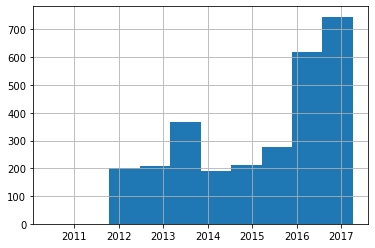

In [11]:
em_tweets.created_at.hist()

In [9]:
em_tweets.head(25)

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https:...
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."
5,848415731502923777,2017-04-02 06:04:07,"b""@Lexxxzis It's just a helicopter in helicopt..."
6,848415356263702528,2017-04-02 06:02:38,"b""@verge It won't matter"""
7,848398971139629057,2017-04-02 04:57:31,b'@SuperCoolCube Pretty good'
8,848244577521647616,2017-04-01 18:44:01,"b""Why did we waste so much time developing sil..."
9,848243350993895424,2017-04-01 18:39:09,b'Technology breakthrough: turns out chemtrail...


In [13]:
pd.set_option('display.max_colwidth',None)
em_tweets.head(25)

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv'
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"""
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead."""
5,848415731502923777,2017-04-02 06:04:07,"b""@Lexxxzis It's just a helicopter in helicopter's clothing"""
6,848415356263702528,2017-04-02 06:02:38,"b""@verge It won't matter"""
7,848398971139629057,2017-04-02 04:57:31,b'@SuperCoolCube Pretty good'
8,848244577521647616,2017-04-01 18:44:01,"b""Why did we waste so much time developing silly rockets? Damn you, aliens! So obtuse! You have all this crazy tech, but can't speak English!?"""
9,848243350993895424,2017-04-01 18:39:09,b'Technology breakthrough: turns out chemtrails are actually a message from time-traveling aliens describing the secret of teleportation'


In [17]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [20]:
pysqldf(' SELECT * FROM em_tweets LIMIT 10;')

,id,created_at,text
0,849636868052275200,2017-04-05 14:56:29.000000,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv'
1,848988730585096192,2017-04-03 20:01:01.000000,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"""
2,848943072423497728,2017-04-03 16:59:35.000000,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,848935705057280001,2017-04-03 16:30:19.000000,b'Stormy weather in Shortville ...'
4,848416049573658624,2017-04-02 06:05:23.000000,"b""@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead."""
5,848415731502923777,2017-04-02 06:04:07.000000,"b""@Lexxxzis It's just a helicopter in helicopter's clothing"""
6,848415356263702528,2017-04-02 06:02:38.000000,"b""@verge It won't matter"""
7,848398971139629057,2017-04-02 04:57:31.000000,b'@SuperCoolCube Pretty good'
8,848244577521647616,2017-04-01 18:44:01.000000,"b""Why did we waste so much time developing silly rockets? Damn you, aliens! So obtuse! You have all this crazy tech, but can't speak English!?"""
9,848243350993895424,2017-04-01 18:39:09.000000,b'Technology breakthrough: turns out chemtrails are actually a message from time-traveling aliens describing the secret of teleportation'


## Initial Feature Exploration / Hypotheses

In [21]:
import ast

In [22]:
em_tweets['text_decode'] = em_tweets['text'].apply(lambda x: ast.literal_eval(x).decode("utf-8"))
em_tweets[:50]

,id,created_at,text,text_decode
0,849636868052275200,2017-04-05 14:56:29,b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv',And so the robots spared humanity ... https://t.co/v7JUJQWfCv
1,848988730585096192,2017-04-03 20:01:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl""","@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr… https://t.co/qQcTqkzgMl"
2,848943072423497728,2017-04-03 16:59:35,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'","@waltmossberg @mims @defcon_5 Et tu, Walt?"
3,848935705057280001,2017-04-03 16:30:19,b'Stormy weather in Shortville ...',Stormy weather in Shortville ...
4,848416049573658624,2017-04-02 06:05:23,"b""@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead.""",@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead.
5,848415731502923777,2017-04-02 06:04:07,"b""@Lexxxzis It's just a helicopter in helicopter's clothing""",@Lexxxzis It's just a helicopter in helicopter's clothing
6,848415356263702528,2017-04-02 06:02:38,"b""@verge It won't matter""",@verge It won't matter
7,848398971139629057,2017-04-02 04:57:31,b'@SuperCoolCube Pretty good',@SuperCoolCube Pretty good
8,848244577521647616,2017-04-01 18:44:01,"b""Why did we waste so much time developing silly rockets? Damn you, aliens! So obtuse! You have all this crazy tech, but can't speak English!?""","Why did we waste so much time developing silly rockets? Damn you, aliens! So obtuse! You have all this crazy tech, but can't speak English!?"
9,848243350993895424,2017-04-01 18:39:09,b'Technology breakthrough: turns out chemtrails are actually a message from time-traveling aliens describing the secret of teleportation',Technology breakthrough: turns out chemtrails are actually a message from time-traveling aliens describing the secret of teleportation


In [23]:
# what to look at ...

# Public Tweets (.@)
# RT's (start as RT)
# Mentions (has an @ sysmbol)
# His own tweets

# First pass ... just exploratory.

### look for purposefully public tweets

In [24]:
for tweet in em_tweets.text_decode:
    if (tweet[:2] == '.@'):
        print(tweet)

.@mcannonbrookes Can only happen with your support, and working closely with key govt and utility leaders who are s… https://t.co/AlfAGI0kLB
.@curtismcauliff SpaceX has not donated to any presidential campaign
.@jbmeicher Model S works great in cold. Highest sales/capita are in Norway and we have a ton of customers in Canada.
.@benmacy $30k in 2013 $ (ie + inflation) w 200+ mile range w some really cool tech that we can't talk about yet.
.@joshj777 It has always been my dream to produce a low cost, compelling electric car. We are 3 to 4 years away. Wish it could be sooner.


### Some functions

In [25]:
# Takes a sentece, splits it and counts the words
def word_count(str):
    counts = dict()
    words = str.split()
    
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    
    return counts

# Take an array of tweets and gits me counts
def tweet_counts(tweet_array, threshold=10):
    unique, counts = np.unique(np.array(tweet_array), return_counts=True)
    count_dict = dict(zip(unique, counts))
    
    return [(k,v) for k, v in count_dict.items() if v > threshold]

### Look for tweets that are replies or are to specific people

In [31]:
import numpy as np

who_he_replies_to = []
for tweet in em_tweets.text_decode:
    if (tweet[:1] == '@'):
        parts = tweet.split()
        for i in range (0, len(parts)):
            if (parts[i][0] == '@'):
                who_he_replies_to.append(parts[i])

In [32]:
tweet_counts(who_he_replies_to, 5)

[('@FortuneMagazine', 7),
 ('@FredericLambert', 16),
 ('@ID_AA_Carmack', 14),
 ('@John_Gardi', 6),
 ('@MacTechGenius', 11),
 ('@SpaceX', 18),
 ('@SwiftOnSecurity', 8),
 ('@TeslaMotors', 32),
 ('@bonnienorman', 6),
 ('@danahull', 8),
 ('@elonmusk', 12),
 ('@mcannonbrookes', 6),
 ('@vicentes', 14)]

In [33]:
replies_df = pd.DataFrame(tweet_counts(who_he_replies_to, 5), columns=['who','count']).sort_values('count', ascending=False)
replies_df

,who,count
7,@TeslaMotors,32
5,@SpaceX,18
1,@FredericLambert,16
2,@ID_AA_Carmack,14
12,@vicentes,14
10,@elonmusk,12
4,@MacTechGenius,11
6,@SwiftOnSecurity,8
9,@danahull,8
0,@FortuneMagazine,7


### Non replies (original posts + RTs) -- mentions

In [ ]:
for tweet in em_tweets.text_decode:
    if (tweet[:1]!='@'):
        print(tweet)

### RT's only

In [35]:
who_he_rts = []
for tweet in em_tweets.text_decode:
    if (tweet[:2] ==  'RT'):
        splits = tweet.split(": ")
        rt, who = splits[0].split(" ")
        who_he_rts.append(who)
    
tweet_counts(who_he_rts, 5)



[('@ElectrekCo', 6),
 ('@Hyperloop', 6),
 ('@NASA', 16),
 ('@OpenAI', 7),
 ('@SpaceX', 105),
 ('@TeslaMotors', 81),
 ('@TheEconomist', 6),
 ('@TheOnion', 7),
 ('@WIRED', 9),
 ('@verge', 6),
 ('@westcoastbill', 6)]

In [36]:
sorted(tweet_counts(who_he_rts, 5), key = lambda x: x[1], reverse = True)

[('@SpaceX', 105),
 ('@TeslaMotors', 81),
 ('@NASA', 16),
 ('@WIRED', 9),
 ('@OpenAI', 7),
 ('@TheOnion', 7),
 ('@ElectrekCo', 6),
 ('@Hyperloop', 6),
 ('@TheEconomist', 6),
 ('@verge', 6),
 ('@westcoastbill', 6)]

### extract url